# Création d'une base de données a partir de données foncieres


## Preparation des données

Dans ce noteobok, on ira créer une base de données a partir d'un fichier simplifié qui presente la liste 
de transaction foncieres pour le premier semestre de l'année 2020. Le fichier a été traité avec Excel Power Query, 
pluseiurs colonnes presentantes de valeurs nuls ont été effacées et un colonne index a été ajoutée:
[DVF](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P3-data.xlsx)


On pourrait en effet lire le fichier in un dateframe Pandas et le transferer sur Db2 avec la commande suivante : `%sql PERSIST`. Pour simplicité le fichier a eté precedemment telechargé sur le cloud IBM car de cette maniere la reconnaissance de types de données representées dans le colonnes du tableau sera meilleure.

## Connection à Db2

Pour nous permettre de nous connecter à la base, il faut nous installer les paquets suivants:

In [1]:
## pour les sql magics
##!pip install ipython-sql
## plugin necessaire pour la connection
!pip install ibm_db
!pip install ibm_db_sa
!pip install sqlalchemy
!pip install ipython-sql

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: Cryptograp

In [72]:
import ibm_db

#import ibm_db_sa

On peut maintenant ouvrir la connection et ensuite rentrer les identifiants du compte Ibm:

In [3]:
%load_ext sql

In [ ]:
# Enter your Db2 credentials in the connection string below
# Recall you created Service Credentials in Part III of the first lab of the course in Week 1
# i.e. from the uri field in the Service Credentials copy everything after db2:// (but remove the double quote at the end)
# for example, if your credentials are as in the screenshot above, you would write:
# %sql ibm_db_sa://my-username:my-pasµsword@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
# Note the ibm_db_sa:// prefix instead of db2://
# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)
# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa

In [71]:
{
    "tags": [
        "hide-cell",
    ]
}
%sql ibm_db_sa://xhz26615:jrkdrws2rsbc%2B7x6@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB


In [5]:
%%sql 
SELECT * FROM syscat.tables where tabschema = 'XHZ26615';

 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,owner,ownertype,TYPE,status,base_tabschema,base_tabname,rowtypeschema,rowtypename,create_time,alter_time,invalidate_time,stats_time,colcount,tableid,tbspaceid,card,npages,mpages,fpages,npartitions,nfiles,tablesize,overflow,tbspace,index_tbspace,long_tbspace,parents,children,selfrefs,keycolumns,keyindexid,keyunique,checkcount,datacapture,const_checked,pmap_id,partition_mode,log_attribute,pctfree,append_mode,REFRESH,refresh_time,LOCKSIZE,VOLATILE,row_format,property,statistics_profile,compression,rowcompmode,access_mode,clustered,active_blocks,droprule,maxfreespacesearch,avgcompressedrowsize,avgrowcompressionratio,avgrowsize,pctrowscompressed,logindexbuild,codepage,collationschema,collationname,collationschema_orderby,collationname_orderby,encoding_scheme,pctpagessaved,last_regen_time,secpolicyid,protectiongranularity,auditpolicyid,auditpolicyname,auditexceptionenabled,definer,oncommit,logged,onrollback,lastused,control,temporaltype,tableorg,extended_row_size,pctextendedrows,remarks
XHZ26615,ADRESSE,XHZ26615,U,T,N,None,None,None,None,2021-04-23 11:00:23.257212,2021-04-23 11:00:23.443423,2021-04-23 11:00:23.858432,2021-04-23 11:02:31.732110,8,5,26,30793,77,0,77,-1,-1,-1,0,xhz26615space1,None,None,0,1,0,1,1,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,80,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2021-04-23 11:00:23.257212,0,,None,None,N,XHZ26615,,,,2021-04-24,,N,R,N,-1.0,None
XHZ26615,BIENIMMO,XHZ26615,U,T,N,None,None,None,None,2021-04-23 11:00:23.459843,2021-04-23 11:00:23.859649,2021-04-23 11:00:23.900635,2021-04-23 11:02:31.768705,5,6,26,34160,47,0,47,-1,-1,-1,0,xhz26615space1,None,None,1,1,0,1,1,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,44,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2021-04-23 11:00:23.459843,0,,None,None,N,XHZ26615,,,,2021-04-24,,N,R,N,-1.0,None
XHZ26615,MUTATION,XHZ26615,U,T,N,None,None,None,None,2021-04-23 11:00:23.643317,2021-04-23 11:00:23.905005,2021-04-23 11:00:23.905015,2021-04-23 11:08:50.000066,4,7,26,34169,29,0,29,-1,-1,-1,0,xhz26615space1,None,None,1,0,0,2,1,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,27,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2021-04-23 11:00:23.643317,0,,None,None,N,XHZ26615,,,,2021-04-24,,N,R,N,-1.0,None
XHZ26615,DVF,XHZ26615,U,T,N,None,None,None,None,2021-04-23 08:18:09.500237,2021-04-23 10:51:33.856524,2021-04-23 10:51:33.856532,2021-04-23 10:57:31.568857,20,4,26,34169,148,0,149,-1,-1,-1,0,xhz26615space1,None,None,0,0,0,0,0,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,150,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2021-04-23 08:18:09.500237,0,,None,None,N,XHZ26615,,,,2021-04-23,,N,R,N,-1.0,None


## Creation des tables et insertion des données

Maintenant on peut créer les tables de notre base de données, qu'on a precedemment modelisé de la manière suivante:

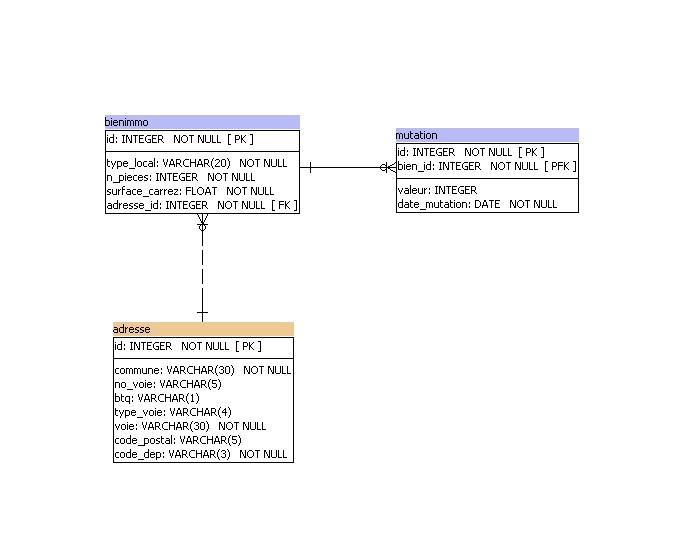

In [13]:
%%sql


CREATE TABLE adresse (
                id INTEGER NOT NULL,
                commune VARCHAR(30) NOT NULL,
                no_voie VARCHAR(5),
                btq VARCHAR(1),
                type_voie VARCHAR(4),
                voie VARCHAR(30) NOT NULL,
                code_postal VARCHAR(5),
                code_dep VARCHAR(3) NOT NULL,
                CONSTRAINT adresse_pk PRIMARY KEY (id)
);


CREATE TABLE bienimmo (
                id INTEGER NOT NULL,
                type_local VARCHAR(20) NOT NULL,
                n_pieces INTEGER NOT NULL,
                surface_carrez FLOAT NOT NULL,
                adresse_id INTEGER NOT NULL,
                CONSTRAINT bienimmo_pk PRIMARY KEY (id)
);


CREATE TABLE mutation (
                id INTEGER NOT NULL,
                bien_id INTEGER NOT NULL,
                valeur INTEGER,
                date_mutation DATE NOT NULL,
                CONSTRAINT mutation_pk PRIMARY KEY (id, bien_id)
);


ALTER TABLE bienimmo ADD CONSTRAINT adresse_bien_fk
FOREIGN KEY (adresse_id)
REFERENCES adresse (id)
ON DELETE NO ACTION
ON UPDATE NO ACTION;

ALTER TABLE mutation ADD CONSTRAINT bien_mutation_fk
FOREIGN KEY (bien_id)
REFERENCES bienimmo (id)
ON DELETE NO ACTION
ON UPDATE NO ACTION;


 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0601N  The name of the object to be created is identical to the existing name "XHZ26615.DEPARTEMENT" of type "TABLE".  SQLSTATE=42710 SQLCODE=-601')
[SQL: CREATE TABLE departement (
                code VARCHAR(10) NOT NULL,
                CONSTRAINT departement_pk PRIMARY KEY (code)
);]
(Background on this error at: http://sqlalche.me/e/f405)


Verifions maintenant nos tables:

In [6]:
%%sql 
SELECT * FROM syscat.tables where tabschema = 'XHZ26615';

 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,owner,ownertype,TYPE,status,base_tabschema,base_tabname,rowtypeschema,rowtypename,create_time,alter_time,invalidate_time,stats_time,colcount,tableid,tbspaceid,card,npages,mpages,fpages,npartitions,nfiles,tablesize,overflow,tbspace,index_tbspace,long_tbspace,parents,children,selfrefs,keycolumns,keyindexid,keyunique,checkcount,datacapture,const_checked,pmap_id,partition_mode,log_attribute,pctfree,append_mode,REFRESH,refresh_time,LOCKSIZE,VOLATILE,row_format,property,statistics_profile,compression,rowcompmode,access_mode,clustered,active_blocks,droprule,maxfreespacesearch,avgcompressedrowsize,avgrowcompressionratio,avgrowsize,pctrowscompressed,logindexbuild,codepage,collationschema,collationname,collationschema_orderby,collationname_orderby,encoding_scheme,pctpagessaved,last_regen_time,secpolicyid,protectiongranularity,auditpolicyid,auditpolicyname,auditexceptionenabled,definer,oncommit,logged,onrollback,lastused,control,temporaltype,tableorg,extended_row_size,pctextendedrows,remarks
XHZ26615,ADRESSE,XHZ26615,U,T,N,None,None,None,None,2021-04-23 11:00:23.257212,2021-04-23 11:00:23.443423,2021-04-23 11:00:23.858432,2021-04-23 11:02:31.732110,8,5,26,30793,77,0,77,-1,-1,-1,0,xhz26615space1,None,None,0,1,0,1,1,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,80,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2021-04-23 11:00:23.257212,0,,None,None,N,XHZ26615,,,,2021-04-24,,N,R,N,-1.0,None
XHZ26615,BIENIMMO,XHZ26615,U,T,N,None,None,None,None,2021-04-23 11:00:23.459843,2021-04-23 11:00:23.859649,2021-04-23 11:00:23.900635,2021-04-23 11:02:31.768705,5,6,26,34160,47,0,47,-1,-1,-1,0,xhz26615space1,None,None,1,1,0,1,1,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,44,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2021-04-23 11:00:23.459843,0,,None,None,N,XHZ26615,,,,2021-04-24,,N,R,N,-1.0,None
XHZ26615,MUTATION,XHZ26615,U,T,N,None,None,None,None,2021-04-23 11:00:23.643317,2021-04-23 11:00:23.905005,2021-04-23 11:00:23.905015,2021-04-23 11:08:50.000066,4,7,26,34169,29,0,29,-1,-1,-1,0,xhz26615space1,None,None,1,0,0,2,1,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,27,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2021-04-23 11:00:23.643317,0,,None,None,N,XHZ26615,,,,2021-04-24,,N,R,N,-1.0,None
XHZ26615,DVF,XHZ26615,U,T,N,None,None,None,None,2021-04-23 08:18:09.500237,2021-04-23 10:51:33.856524,2021-04-23 10:51:33.856532,2021-04-23 10:57:31.568857,20,4,26,34169,148,0,149,-1,-1,-1,0,xhz26615space1,None,None,0,0,0,0,0,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,150,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2021-04-23 08:18:09.500237,0,,None,None,N,XHZ26615,,,,2021-04-23,,N,R,N,-1.0,None


On peut remarquer que a DVF (la table "source") qu'on a precedemment telechargé, on voit les 4 tables faisant partie de notre modèle.

### Insertion des données

In [15]:
%%sql
INSERT INTO BIENIMMO
SELECT DISTINCT "id_bien", "type_local", "n_pieces", "surf_carrez", "id_localisation"
FROM DVF;

INSERT INTO MUTATION
SELECT DISTINCT "id_transaction", "id_bien", "valeur", "date_mut"
FROM DVF;

INSERT INTO ADRESSE
SELECT DISTINCT "id_localisation", "commune", "no_voie", "b_t_q", "type_voie", "voie", "code_postal", "code_dep"
FROM DVF; 

 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0117N  The number of values assigned is not the same as the number of specified or implied columns or variables.  SQLSTATE=42802 SQLCODE=-117')
[SQL: INSERT INTO DEPARTEMENT SELECT DISTINCT "Code_departement"
FROM DVF;]
(Background on this error at: http://sqlalche.me/e/f405)


In [8]:
%sql SELECT * FROM syscat.columns WHERE tabname = 'BIENIMMO'

 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,colname,colno,typeschema,typename,length,scale,typestringunits,stringunitslength,DEFAULT,NULLS,codepage,collationschema,collationname,logged,compact,colcard,high2key,low2key,avgcollen,keyseq,partkeyseq,nquantiles,nmostfreq,numnulls,target_typeschema,target_typename,scope_tabschema,scope_tabname,source_tabschema,source_tabname,dl_features,special_props,hidden,inline_length,pctinlined,IDENTITY,rowchangetimestamp,GENERATED,text,compress,avgdistinctperpage,pagevarianceratio,sub_count,sub_delim_length,avgcollenchar,implicitvalue,seclabelname,rowbegin,rowend,transactionstartid,pctencoded,avgencodedcollen,qualifier,func_path,randdistkey,remarks
XHZ26615,BIENIMMO,ID,0,SYSIBM,INTEGER,4,0,None,None,None,N,0,None,None,,,34160,34159,2,4,1,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
XHZ26615,BIENIMMO,TYPE_LOCAL,1,SYSIBM,VARCHAR,20,0,OCTETS,20,None,N,1208,SYSIBM,IDENTITY,,,2,'Maison','Appartement',15,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,11,None,None,N,N,N,-1,-1.0,None,None,N,None
XHZ26615,BIENIMMO,N_PIECES,2,SYSIBM,INTEGER,4,0,None,None,None,N,0,None,None,,,12,10,1,4,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
XHZ26615,BIENIMMO,SURFACE_CARREZ,3,SYSIBM,DOUBLE,8,0,None,None,None,N,0,None,None,,,3328,+4.93600000000000E+003,+5.00000000000000E-001,8,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
XHZ26615,BIENIMMO,ADRESSE_ID,4,SYSIBM,INTEGER,4,0,None,None,None,N,0,None,None,,,30793,30792,2,4,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None


## Requetes

1) Total d'appartements vendus dans le 1er semestre:

In [9]:
%%sql SELECT  COUNT(*)
  FROM BIENIMMO B  JOIN MUTATION
  ON B.ID = BIEN_ID
  WHERE TYPE_LOCAL  = 'Appartement';
  

 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


1
31378


2. Pourcentage d'appartements par n pieces:

In [66]:
%%sql
SELECT N_PIECES, CAST(COUNT(*) /(
  SELECT  COUNT(*)
  FROM BIENIMMO B JOIN MUTATION
  ON B.ID = BIEN_ID
  WHERE TYPE_LOCAL  LIKE  'Appartement') *100 AS DECIMAL(5,2))  AS POURCENTAGE
  FROM BIENIMMO  B JOIN MUTATION
  ON B.ID = BIEN_ID
  WHERE TYPE_LOCAL LIKE 'Appartement'
  GROUP BY N_PIECES
  ORDER BY POURCENTAGE DESC;

 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


n_pieces,pourcentage
2,31.17
3,28.57
1,21.47
4,14.21
5,3.55
6,0.65
7,0.17
0,0.09
8,0.05
9,0.02


3. Liste des 10 departements avec le prix au m2 plus elevé:

In [11]:
%%sql
  SELECT CODE_DEP, CAST(AVG(VALEUR/SURFACE_CARREZ) AS INTEGER) AS PRIX_M2
  FROM ADRESSE A JOIN BIENIMMO B 
  ON  A.ID = ADRESSE_ID JOIN MUTATION M
  ON B.ID = BIEN_ID
  GROUP BY CODE_DEP
  ORDER BY PRIX_M2 DESC
  LIMIT 10;


 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


code_dep,prix_m2
75,12052
92,7219
94,5343
6,4700
74,4667
93,4344
78,4225
69,4059
2A,4026
33,3764


4. Prix moyen au m2 d'une maison en Ile de France:

In [13]:
%%sql
SELECT
   CAST(AVG(VALEUR/SURFACE_CARREZ) AS INTEGER) AS PRIX_MOYEN_M2_MAISON_ILE_DE_FRANCE
  FROM BIENIMMO b JOIN MUTATION m  ON b.id= bien_id JOIN ADRESSE a ON adresse_id = a.id
  WHERE CODE_DEP IN ('75' , '77' ,  '78' , '91' , '92' , '93' , '94' , '95' )
  AND TYPE_LOCAL = 'Maison';


 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


prix_moyen_m2_maison_ile_de_france
3745


5. Le 10 appartements les plus chers:

In [63]:
%%sql
  SELECT B.ID, COMMUNE, CODE_DEP, SURFACE_CARREZ, VALEUR
  FROM BIENIMMO B JOIN ADRESSE A ON ADRESSE_ID = A.ID
  JOIN MUTATION ON B.ID = BIEN_ID
  WHERE TYPE_LOCAL = 'Appartement' AND VALEUR IS NOT NULL
  ORDER BY VALEUR DESC
  LIMIT 10;

 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


id,commune,code_dep,surface_carrez,valeur
117,PARIS 16,75,9.1,9000000
20755,CORBEIL ESSONNES,91,64.0,8600000
31342,PARIS 07,75,20.55,8577713
11712,PARIS 17,75,42.77,7620000
31080,PARIS 06,75,253.3,7600000
29909,PARIS 01,75,139.9,7535000
31361,PARIS 16,75,360.95,7420000
31351,PARIS 16,75,595.0,7200000
31344,PARIS 01,75,122.56,7050000
24324,PARIS 01,75,79.38,6600000


6. Taux d'evolution des ventes entre le premier et le deuxieme trimestre 2020:

In [65]:
%%sql
WITH sub AS (
SELECT
  COUNT(
  CASE WHEN DATE_MUTATION > '2020-03-31' THEN 1 END ) /
  COUNT(CASE WHEN DATE_MUTATION  <= '2020-03-31' THEN 1 END) - 1 AS taux_ev_ventes
  FROM MUTATION) SELECT CAST(taux_ev_ventes *100 AS DECIMAL (3,2)) as taux_evolution_ventes_1er_2eme_trimestre FROM sub ;



 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


taux_evolution_ventes_1er_2eme_trimestre
3.67


7. Liste des communes où le taux d’évolution des ventes est supérieur à 20 % entre le premier et le second trimestre de 2020

In [67]:
%%sql
WITH sub AS (SELECT COMMUNE, COUNT(
  CASE WHEN DATE_MUTATION > '2020-03-31' THEN 1 END ) /
  NULLIF(
  COUNT(CASE WHEN DATE_MUTATION   <= '2020-03-31' THEN 1 END),0) - 1 AS tev
  FROM MUTATION M, BIENIMMO B, ADRESSE A
  WHERE BIEN_ID = B.ID AND ADRESSE_ID = A.ID
  GROUP BY COMMUNE
  ORDER BY tev DESC)
SELECT commune, CAST(tev * 100 AS DECIMAL(7,2)) as taux_ev_ventes FROM sub WHERE tev > 0.20; 

 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


commune,taux_ev_ventes
PAU,2500.00
CAVAILLON,1600.00
L ISLE SUR LA SORGUE,1200.00
LE DEVOLUY,1000.00
MORLAIX,1000.00
LYON 8EME,960.00
LYON 7EME,800.00
RONCHIN,800.00
CHALON-SUR-SAONE,766.66
ROUEN,716.66


8.  Différence en pourcentage du prix au mètre carré entre un appartement de 2 pièces et un appartement de 3 pièces

In [60]:
%%sql
 WITH PIECE2 AS 
(
  SELECT AVG(VALEUR/SURFACE_CARREZ) AS PRIXM2_2P
  FROM BIENIMMO B JOIN ADRESSE A ON ADRESSE_ID = A.ID
JOIN MUTATION ON B.ID = BIEN_ID
  WHERE TYPE_LOCAL = 'Appartement' AND N_PIECES = 2 ), PIECE3 AS (
  SELECT AVG(VALEUR/SURFACE_CARREZ) AS PRIXM2_3P
  FROM BIENIMMO B JOIN ADRESSE A ON ADRESSE_ID = A.ID
JOIN MUTATION ON B.ID = BIEN_ID
  WHERE TYPE_LOCAL = 'Appartement' AND N_PIECES = 3 )
  SELECT  ROUND(((PRIXM2_2P / PRIXM2_3P ) - 1) *100 ,2) AS "diff_%_2P_3P"
  FROM PIECE2, PIECE3;
  
 

 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


diff_%_2P_3P
14.16


9. Taux d’appartements qui ont été vendus à un prix du mètre carré deux fois plus élevé que le prix du mètre carré moyen du département:

In [69]:
%%sql

WITH avgprd  AS (
  SELECT CODE_DEP, AVG(valeur/surface_carrez) as mpd
  FROM BIENIMMO b JOIN ADRESSE a ON adresse_id = a.id
  JOIN mutation on bien_id = b.id
  GROUP BY CODE_DEP), prapp AS (SELECT b.ID, CODE_DEP, valeur/surface_carrez as pm2 
  FROM BIENIMMO b JOIN ADRESSE a ON adresse_id = a.id
  JOIN mutation on bien_id = b.id WHERE type_local = 'Appartement'),  app2x AS
  (SELECT COUNT(*) as count_app2x FROM prapp JOIN avgprd USING (code_dep) WHERE pm2 >= 2*mpd),
  totapp AS (SELECT COUNT (*) as totale FROM prapp )
  SELECT CAST(count_app2x / totale * 100 AS DECIMAL(5,2)) as taux_appartements_2pm FROM app2x, totapp;

 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


taux_appartements_2pm
2.24


10. Moyennes valeurs foncieres pour les top 20 communes:


In [70]:
%%sql
 SELECT CAST(AVG(VALEUR) as INTEGER) as moyennevf, COMMUNE FROM MUTATION m, BIENIMMO b, ADRESSE a
 WHERE bien_id = b.id AND adresse_id = a.id
 AND VALEUR IS NOT NULL
 GROUP BY COMMUNE
 ORDER BY moyennevf DESC
 LIMIT 10;
  

 * ibm_db_sa://xhz26615:***@dashdb-txn-sbox-yp-dal09-14.services.dal.bluemix.net:50000/BLUDB
Done.


moyennevf,commune
1683000,GARRIGUES SAINTE EULALIE
1400000,LES PORTES-EN-RE
1280000,VERNEUIL EN HALATTE
1251288,PARIS 07
1028243,PARIS 16
1013503,PARIS 01
1010536,PARIS 08
1005955,PARIS 06
968750,SAINT-JEAN-CAP-FERRAT
880000,VAL-D ISERE
